<font size = 3> <b> Упр.1 </b> </font>
Проверить размер встроенного типа плавающая точка и numpy.float64. т.е. берем 1 и делим на 2 пока не ноль.
\
а) x = numpy.float64(1.0), 
\
б) x = 1.0

In [1]:
import numpy as np

In [2]:
#Вывожу число итераций
def check_size(a):
    i=0
    while(a>0):
        a=a/2
        i+=1
    return i

In [3]:
print("float: ", check_size(1.0))
print("numpy.float64: ", check_size(np.float64(1.0)))

float:  1075
numpy.float64:  1075


<font size = 3> <b> Упр.2 </b> </font> По массиву значений построй массив отношения текущего элемента к последующему (результирующий массив будет на один элемент меньше).

In [4]:
a = np.array( [1, 2, 3, 4])

In [5]:
a[1:]/a[:-1]

array([2.        , 1.5       , 1.33333333])

<font size = 3> <b> Упр.3 </b> </font> По массиву посчитай скользящее среднее, т.е. среднее окна из например 10 элементов. Окно скользит по массиву.

In [6]:
wsize=10

In [7]:
a = np.array( list(range(50)))

In [8]:
#k - начало периода
#wsize - размер окна
def sliding_mean(a,k,wsize):
    if k+wsize>len(a)-1:
        print("Окно выходит за массив")
        return 0
    else:    
        return a[k:k+wsize].sum()/wsize
        

In [9]:
sliding_mean(a, 1, wsize)

5.5

<font size = 3> <b> Упр.4 </b> </font> Нарисуй график данной прямой. Лучше поверх исходных данных.


In [10]:
import matplotlib.pyplot as plt

(-5.725, 10.225, -5.44874786625647, 1.8462037891510328)

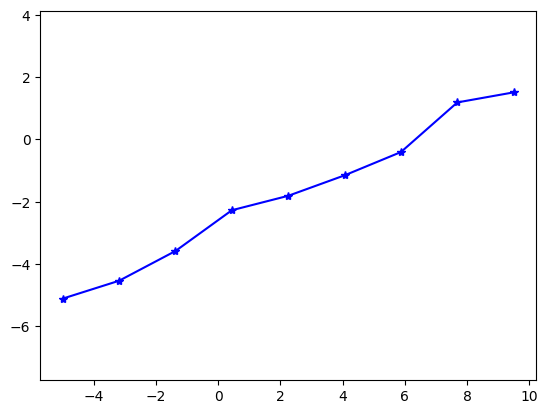

In [11]:
x = np.linspace(-5, 9.5, 9)
y = 0.5*x - 3
#Добавили шума
yy = y + np.random.randn( y.shape[0] )/3
plt.plot(x, yy, '*-b')
plt.axis('equal')

In [12]:
#решаем здесь yr=A*b (А состоит из x и единичек)
A = np.array( [np.ones_like(x), x ] ).T
b = np.linalg.pinv( (A.T).dot(A) ).dot(A.T).dot(yy)
yr=A.dot(b)
yr

array([-5.21287022, -4.35929014, -3.50571006, -2.65212998, -1.7985499 ,
       -0.94496982, -0.09138974,  0.76219034,  1.61577042])

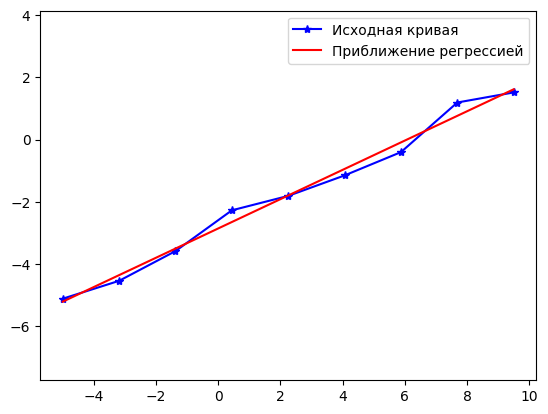

In [13]:
plt.plot(x, yy, '*-b', label = "Исходная кривая")
plt.plot(x, yr, '-r', label = "Приближение регрессией")
plt.axis('equal')
plt.legend();